In [1]:
!pip install qiskit
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d419aae4c73568f4dec19fa4aa8ae6513cfcfaa068334f83b2fbe0c993b3c496
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Quantum Teleportation Circuit:


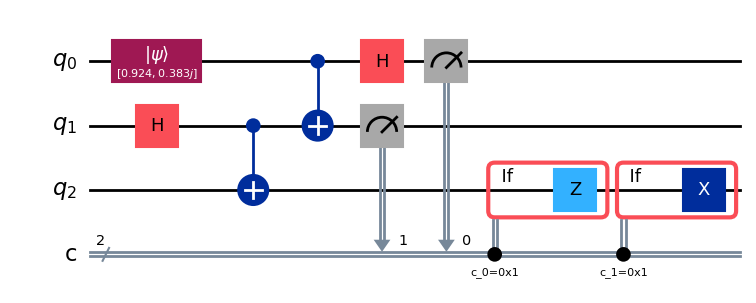

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

qreg = QuantumRegister(3, 'q')  # q0: psi, q1: Alice's part, q2: Bob's part
creg = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg, creg)

theta, phi = np.pi/4, np.pi/2
qc.initialize([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)], qreg[0])

qc.h(qreg[1])
qc.cx(qreg[1], qreg[2])

qc.cx(qreg[0], qreg[1])
qc.h(qreg[0])

qc.measure(qreg[0], creg[0])
qc.measure(qreg[1], creg[1])

with qc.if_test((creg[0], 1)):
    qc.z(qreg[2])
with qc.if_test((creg[1], 1)):
    qc.x(qreg[2])

print("Quantum Teleportation Circuit:")
qc.draw(output='mpl', style='iqp')